<a href="https://colab.research.google.com/github/tosittig/CASAIS/blob/main/Project_2_Sect_4_Assmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Object Detection and Image Segmentation
## Project 2 - Section 4

### List of Tasks

Task 1
Perform object detection on this image cat and dog by using the DETR pre-trained model. Here is the URL https://www.companionanimalclinicvirginia.com/wp-content/uploads/2018/12/white_cat_and_dog.jpg.

Install transformers and timm package

In [ ]:
!pip install transformers
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

Import the classes DetrImageProcessor and DetrForObjectDetection from transfomers

In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection

Load the model for preprocessing

In [ ]:
image_processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Load the object detector model

In [ ]:
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Load the image

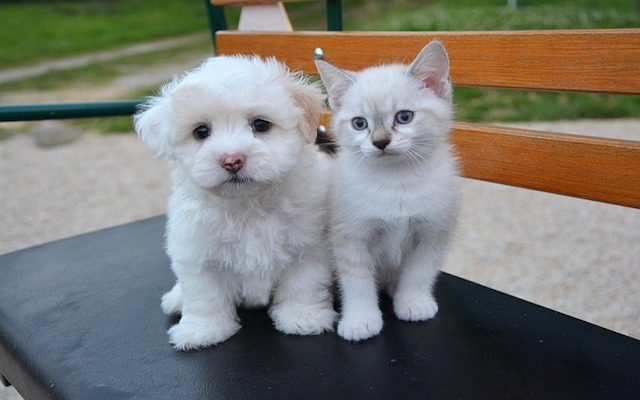

In [ ]:
from PIL import Image, ImageDraw
import requests
import torch

url = "https://www.companionanimalclinicvirginia.com/wp-content/uploads/2018/12/white_cat_and_dog.jpg."
image = Image.open(requests.get(url, stream=True).raw)
image

Pre-process the image

In [ ]:
inputs = image_processor(images = image,
                         return_tensors = "pt")
outputs = model(**inputs)
target_sizes = torch.tensor([image.size[::-1]])

post-process image and show results

In [ ]:
results = image_processor.post_process_object_detection(outputs,
                                                        target_sizes = target_sizes,
                                                        threshold = 0.9)[0]
results

{'scores': tensor([0.9973, 0.9950, 0.9983], grad_fn=<IndexBackward0>),
 'labels': tensor([15, 18, 17]),
 'boxes': tensor([[-1.6191e-01,  2.6882e+01,  6.3982e+02,  3.9589e+02],
         [ 1.3114e+02,  5.2755e+01,  3.3661e+02,  3.5084e+02],
         [ 3.1079e+02,  3.8568e+01,  4.6355e+02,  3.4161e+02]],
        grad_fn=<IndexBackward0>)}

Visualize detected objects

In [ ]:
draw = ImageDraw.Draw(image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )


Detected bench with confidence 0.997 at location [-0.16, 26.88, 639.82, 395.89]
Detected dog with confidence 0.995 at location [131.14, 52.75, 336.61, 350.84]
Detected cat with confidence 0.998 at location [310.79, 38.57, 463.55, 341.61]


Draw boxes around objects and display labels

Detected bench with confidence 0.997 at location [-0.16, 26.88, 639.82, 395.89]
Detected dog with confidence 0.995 at location [131.14, 52.75, 336.61, 350.84]
Detected cat with confidence 0.998 at location [310.79, 38.57, 463.55, 341.61]


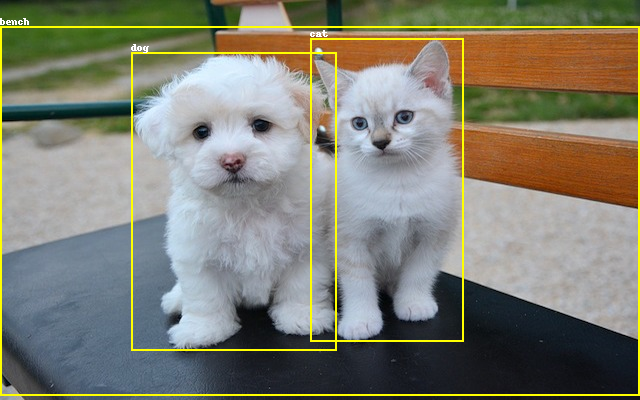

In [ ]:
draw.rectangle(box, outline="yellow", width=2)

draw = ImageDraw.Draw(image)
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    draw.rectangle(box, outline='yellow', width=2)
    draw.text((box[0], box[1]-10),
              model.config.id2label[label.item()],
              fill='white')
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )
image

##Task 3
Perform semantic image segmentation on this image. Here is the URL https://cdn.pixabay.com/photo/2017/12/27/14/02/friends-3042751_960_720.jpg. Use the following models:



*   FCN: You can load this model with the command model = fcn_resnet101 (pretrained=True). Do not forget to import it.

*  LRASPP MobileNetV3: You can load this model with the command model = lraspp_mobilenet_v3_large(pretrained=True).


Which one works best for this image? Do the same for the image of the cats and dogs. Which one works best for that image?


Import required tools

In [ ]:
import torch
import torchvision.transforms as T
from torchvision.models.segmentation import fcn_resnet101
from PIL import Image
import requests
from matplotlib import pyplot as plt

Load the model

In [ ]:
model = fcn_resnet101(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet101_coco-7ecb50ca.pth
100%|██████████| 208M/208M [00:06<00:00, 34.4MB/s]


Load and open the image

In [ ]:
image_url = 'https://cdn.pixabay.com/photo/2017/12/27/14/02/friends-3042751_960_720.jpg'
response = requests.get(image_url)
image = Image.open(requests.get(image_url, stream=True).raw)

pre-process the image

In [ ]:
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)

Analyze the image

In [ ]:
with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

Visualize the results

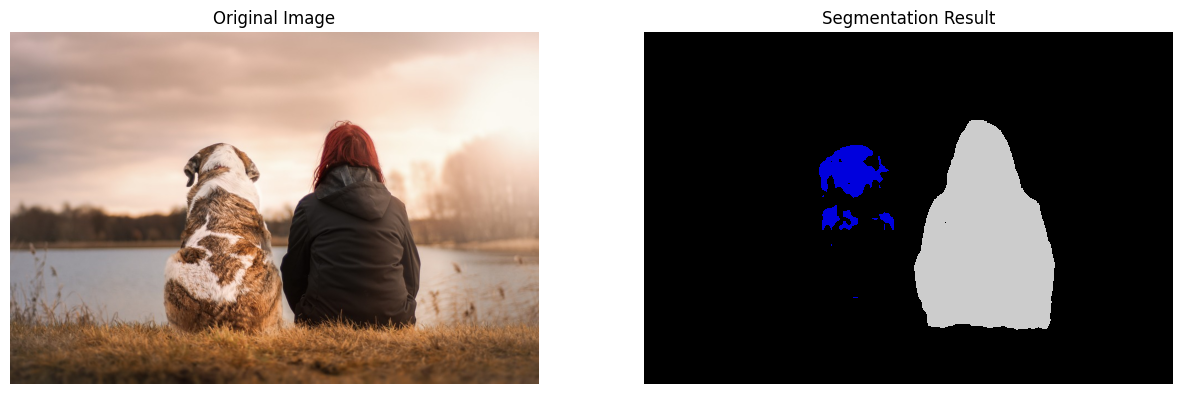

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')  # Hide the axis for a cleaner look
plt.subplot(1, 2, 2)
# We use a color map to differentiate the segments identified by the model.
plt.imshow(output_predictions.byte().cpu().numpy(), cmap='nipy_spectral', interpolation='nearest')
plt.title('Segmentation Result')
plt.axis('off')
plt.show()

##Part 2: Do the same with LRASP MobileNetV3 model

Import required tools

In [ ]:
import torch
import torchvision.transforms as T
from torchvision.models.segmentation import lraspp_mobilenet_v3_large
from PIL import Image
import requests
from matplotlib import pyplot as plt

Load the model

In [ ]:
model = model = lraspp_mobilenet_v3_large(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=LRASPP_MobileNet_V3_Large_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=LRASPP_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/lraspp_mobilenet_v3_large-d234d4ea.pth" to /root/.cache/torch/hub/checkpoints/lraspp_mobilenet_v3_large-d234d4ea.pth
100%|██████████| 12.5M/12.5M [00:00<00:00, 38.1MB/s]


Load and open the image

In [ ]:
image_url = 'https://cdn.pixabay.com/photo/2017/12/27/14/02/friends-3042751_960_720.jpg'
response = requests.get(image_url)
image = Image.open(requests.get(image_url, stream=True).raw)

pre-process the image

In [ ]:
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)

Analyze the image

In [ ]:
with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

Visualize the results

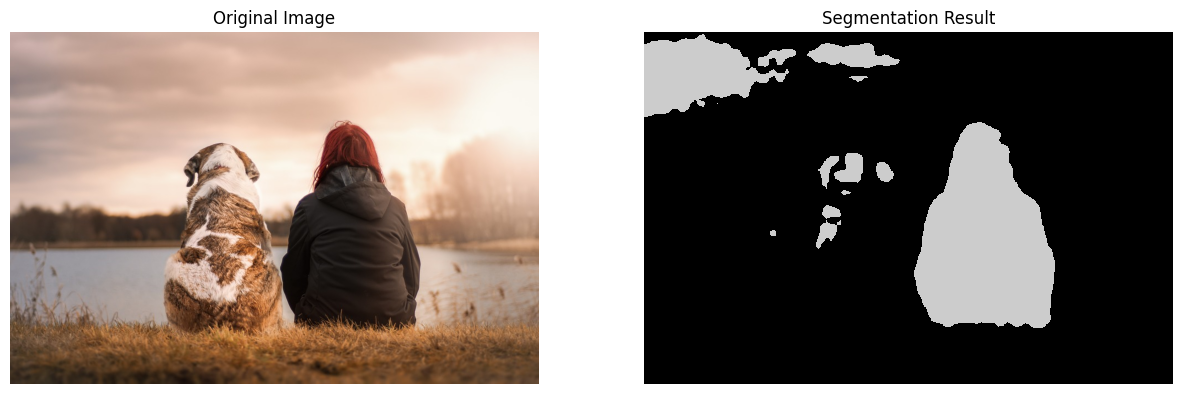

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')  # Hide the axis for a cleaner look
plt.subplot(1, 2, 2)
# We use a color map to differentiate the segments identified by the model.
plt.imshow(output_predictions.byte().cpu().numpy(), cmap='nipy_spectral', interpolation='nearest')
plt.title('Segmentation Result')
plt.axis('off')
plt.show()

It seems that FCN model works better, given that it correctly identifies two different objects. Both models fail however to detect the real size an shape of zthe dog. This could potentially be solved by thresholding the image.